### AGN Photometry: UV-IR Color Relations & Automation

This research project involves the analysis of 27 Active Galactic Nuclei (AGN) sources with Ultraviolet (UV) data obtained from a pipeline in various filters. The primary objective was to reproduce the pipeline data using the Swift UVOT software and its diverse methods. However, discrepancies between the measured magnitudes and the original pipeline data were observed, indicating potential differences in aperture sizes.

To address this issue, a Curve of Growth model was employed, where magnitudes were measured for various aperture sizes to study how the magnitude changes with aperture radius. The count rates increased with the aperture radius until reaching a plateau, signifying the inclusion of more background and less of the source beyond a certain radius. Comparison of the Curve of Growth model with the pipeline data demonstrated that the pipeline magnitude values were approached with an increase in aperture radius.

The project further involved comparing the UV data with the Infrared (IR) magnitudes obtained from the Two Micron All Sky Survey for all aperture radii. This comparison provided valuable insights into the star formation rates of galaxies. The difference between the UV and IR magnitudes, along with the corresponding color, served as an indicator of star formation rates. 

An ultimate goal of this project was to automate the entire photometry process to streamline data analysis and ensure more consistent and reliable results. Automating the photometry process would enhance efficiency and reproducibility, allowing for larger sample sizes to be analyzed systematically.

#### Import Modules

In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import os

#### Get a List of Obs IDs

In [2]:
directory = os.fsencode('/mnt/home/guptaagr/swift27/')
directories = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename[0]!='0':
        continue
    else:
        directories.append(filename)
directories=sorted(directories)

In [4]:
filters = ['uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [5.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")
                mag_data5 = Table(maghist[1].data)
                mags.append(mag_data5['CORR_RATE'].mean())
            else:
                continue
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
print(mag_data5['MAG'])
print('ZEROPOINT')
print(2.5*np.log10(mag_data5['AP_COI_SRC_RATE'])+mag_data5['MAG'])
print(mag_data5['RAW_TOT_RATE'])
print(mag_data5['AP_COI_SRC_RATE'])
mag_data5

   MAG   
---------
14.537017
14.549903
14.487471
ZEROPOINT
AP_COI_SRC_RATE
---------------
      18.164051
       18.16205
      18.162874
RAW_TOT_RATE
------------
    24.93283
   24.730814
   25.848265
AP_COI_SRC_RATE
---------------
      28.236668
      27.852156
      29.523079


<Table length=3>
      MET         EXTNAME         TSTART     ... QUALFLAG PHOTFLAG CORRFLAG
    float64        str12         float64     ...  int32    int32    int32  
--------------- ------------ --------------- ... -------- -------- --------
640832755.63961 uu640832728I  640832728.2559 ...     -999        2        0
640879435.46638 uu640879422I 640879422.60752 ...     -999        2        0
640913068.23658 uu640913026I 640913026.30596 ...     -999        2        0

In [ ]:
filters = ['uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [35.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")
                mag_data35 = Table(maghist[1].data)
                mags.append(mag_data35['CORR_RATE'].mean())
            else:
                continue
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
print(mag_data35['MAG'])
print('ZEROPOINT')
print(2.5*np.log10(mag_data35['AP_COI_SRC_RATE'])+mag_data35['MAG'])
print(mag_data35['RAW_TOT_RATE'])
print(mag_data35['AP_COI_SRC_RATE'])
mag_data35

In [12]:
filters = ['uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [5.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")
                mag_data5 = Table(maghist[1].data)
                mags.append(mag_data5['CORR_RATE'].mean())
            else:
                continue
        for radius in [35.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")
                mag_data35 = Table(maghist[1].data)
                mags.append(mag_data35['CORR_RATE'].mean())
            else:
                continue
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
print(mag_data35['RAW_TOT_RATE']-mag_data5['RAW_TOT_RATE'])
print(mag_data35['AP_COI_SRC_RATE']-mag_data5['AP_COI_SRC_RATE'])
print('MAGNITUDE OF 35"-5"')
print(18.16-2.5*np.log10(mag_data35['AP_COI_SRC_RATE']-mag_data5['AP_COI_SRC_RATE']))

RAW_TOT_RATE
------------
   86.958755
    88.23153
    82.19536
AP_COI_SRC_RATE
---------------
      45.660015
      42.062424
       40.77677
MAGNITUDE OF 35"-5"
AP_COI_SRC_RATE
---------------
       14.01116
      14.100264
      14.133968


In [ ]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Iterate over the observation directories
for obs_id in directories:
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist{filterr}_{str(radius)}00_{obs_id}.fits")[1].data['MAG'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist{filterr}_{str(radius)}00_{obs_id}.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the magnitudes for the filter and observation ID
            plt.plot(radii, mags, label=f"{obs_id}_{filterr}")

# Add a legend to the plot
plt.legend()

#### Plot the Curve of Growth Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

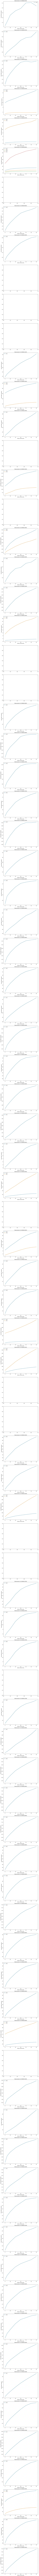

In [3]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Calculate the number of plots needed based on the number of observation directories
num_plots = len(directories)

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")[1].data['AP_COI_SRC_RATE'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the count rates for the filter and observation ID in the respective subplot
            axs[i].plot(radii, mags, label=f"{filterr}")
            axs[i].set_title(f"Observation ID: {obs_id}")
            axs[i].set_xlabel('Radius (arcseconds)')
            axs[i].set_ylabel('Count Rate (counts/s)')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### Plot the Curve of Growth Model with Magnitudes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

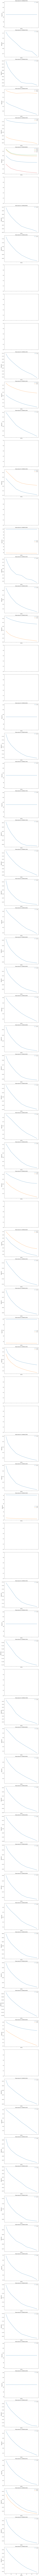

In [5]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Calculate the number of plots needed based on the number of observation directories
num_plots = len(directories)

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots), sharex=True)

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")[1].data['AB_MAG'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the magnitudes for the filter and observation ID in the respective subplot
            axs[i].plot(radii, mags, label=f"{filterr}")
            axs[i].set_title(f"Observation ID: {obs_id}")
            axs[i].set_xlabel('Radius')
            axs[i].set_ylabel('Magnitude')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### UV-IR Color Relations

In [13]:
phot = pd.read_csv("All27_UV_OM_Photometry.csv")

In [14]:
phot = phot.drop(['Name.1','RA_decimal','Dec_decimal','V','V_err','V_flux','V_fluxerr','B','B_err','B_flux','B_fluxerr'], axis=1)

In [15]:
phot.head()

Name SWIFT Target ID Exposure     UVM2  UVM2_err     UVM2_flux  \
0  1H0323+342           96107    1,2,3  15.9844     0.050  1.870000e-15   
1         NaN           96107        4  15.9851     0.030  1.870000e-15   
2  1H1934-063           96108        1  14.9353     0.015  4.930000e-15   
3       3C120           96109        1  14.8860     0.015  5.150000e-15   
4       3C382           96110        1  15.3800     0.030  3.260000e-15   

   UVM2_fluxerr     UVW1  UVW1_err     UVW1_flux  UVW1_fluxerr   UVW2  \
0  8.620000e-17  15.5973    0.0260  2.300000e-15  5.560000e-17  15.92   
1  5.950000e-17      NaN       NaN           NaN           NaN  16.10   
2  6.840000e-17  14.3808    0.0149  7.040000e-15  9.720000e-17  14.79   
3  7.310000e-17      NaN       NaN           NaN           NaN    NaN   
4  9.710000e-17      NaN       NaN           NaN           NaN    NaN   

   UVW2_err     UVW2_flux  UVW2_fluxerr     U   U_err        U_flux  \
0     0.015  2.290000e-15  3.070000e-17   NaN     NaN           NaN   
1     0.030  1.950000e-15  5.310000e-17   NaN     NaN           NaN   
2     0.014  6.470000e-15  8.640000e-17  13.5  0.0119  1.410000e-14   
3       NaN           NaN           NaN   NaN     NaN           NaN   
4       NaN           NaN           NaN   NaN     NaN           NaN   

      U_fluxerr  
0           NaN  
1           NaN  
2  1.540000e-16  
3           NaN  
4           NaN

In [16]:
two_mass = pd.read_csv("2mass.csv")

In [17]:
two_mass.iloc[6][['j_m_5','j_m_7','j_m_10','j_m_15','j_m_20','j_m_25']]
two_mass.iloc[6][['j_msig_5','j_msig_7','j_msig_10','j_msig_15','j_msig_20','j_msig_25']]

j_msig_5     0.013
j_msig_7     0.016
j_msig_10    0.018
j_msig_15    0.022
j_msig_20    0.027
j_msig_25    0.032
Name: 6, dtype: object

In [18]:
cdir = os.getcwd()
obs_id = '00096113003'
mags = np.array([])
errs = np.array([])
radii = np.array([5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000])
for radius in radii:
    maghist5 = fits.open(f"{obs_id}/uvot/image/maghist_uw1_{str(radius)}00_{obs_id}_noapcorr.fits")
    mag_data = Table(maghist5[1].data)
    mags = np.append(mags, mag_data['MAG'].mean())
    errs = np.append(errs, mag_data['MAG_ERR'].mean())

In [19]:
mag_data

<Table length=2>
      MET         EXTNAME         TSTART     ... QUALFLAG PHOTFLAG CORRFLAG
    float64        str12         float64     ...  int32    int32    int32  
--------------- ------------ --------------- ... -------- -------- --------
641574338.26265 w1641573835I 641573835.50904 ...     -999        2        0
 641579961.1295 w1641579898I 641579898.36322 ...     -999        2        0

In [20]:
imags = np.array(two_mass.iloc[6][['j_m_5','j_m_7','j_m_10','j_m_15','j_m_20','j_m_25','j_m_30']].tolist())
ierrs = np.array(two_mass.iloc[6][['j_msig_5','j_msig_7','j_msig_10','j_msig_15','j_msig_20','j_msig_25','j_msig_30']].tolist())

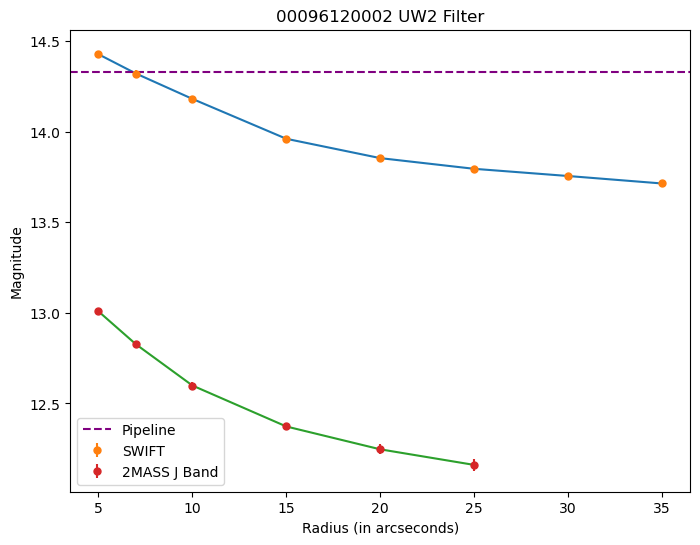

In [21]:
plt.figure(figsize=(8,6))
plt.plot(radii, mags)
plt.errorbar(radii, mags, yerr = errs, fmt='o', label='SWIFT', markersize=5)
plt.plot(radii[:7], imags)
plt.errorbar(radii[:7], imags, yerr = ierrs, fmt='o', label='2MASS J Band', markersize=5)
plt.axhline(14.33, linestyle='--', color='purple', label='Pipeline')
plt.title('00096120002 UW2 Filter')
plt.xlabel('Radius (in arcseconds)')
plt.ylabel('Magnitude')
plt.legend();

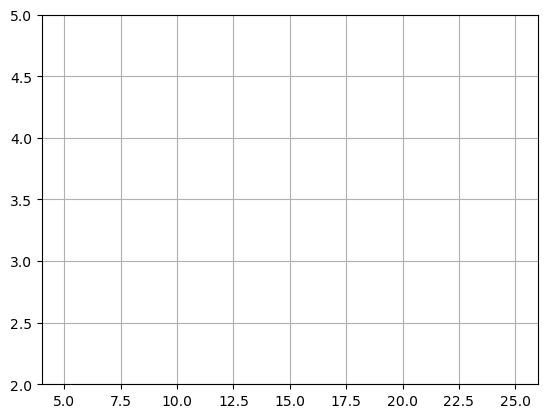

In [22]:
error = np.sqrt(errs[:7]**2+ierrs**2)
diff = mags[:7]-imags
plt.plot(radii[:7], diff, color='#069af3', linestyle='-', marker='o', markersize=5)
plt.errorbar(radii[:7], diff, yerr=error, fmt='none', ecolor='#069af3', capsize=3)
plt.grid()
plt.ylim(2,5);

In [23]:
def mag_plot(obs_id, uv_filter, ir_filter):
    cdir = os.getcwd()
    mags = []
    errs = []
    radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
    for radius in radii:
        filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius)}00_{obs_id}_noapcorr.fits"
        if not os.path.exists(filepath):
            raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")
        maghist5 = fits.open(filepath)
        mag_data = Table(maghist5[1].data)
        mags.append(mag_data['MAG'].mean())
        errs.append(mag_data['MAG_ERR'].mean())
    obs = int(int(obs_id)/1000)
    exp = obs_id[-1]
    idx = obs-96107
    ir_radii = [5, 7, 10, 15, 20, 25, 30]
    imags = []
    ierrs = []
    for r in ir_radii:
        imags.append(two_mass.iloc[idx][[f'{ir_filter}_m_{r}']].values[0])
        ierrs.append(two_mass.iloc[idx][[f'{ir_filter}_msig_{r}']].values[0])
    plt.figure(figsize=(8,6))
    plt.plot(radii, mags)
    plt.errorbar(radii, mags, yerr = errs, fmt='o', label='SWIFT', markersize=5)
    plt.plot(ir_radii, imags)
    plt.errorbar(ir_radii, imags, yerr = ierrs, fmt='o', label=f'2MASS {ir_filter.upper()} Band', markersize=5)
    obs_data_old = phot.loc[phot['SWIFT Target ID'] == str(obs)]
    obs_data = obs_data_old[obs_data_old['Exposure'].str.contains(exp)]
    if not obs_data.empty:
        uv_filter_map = {'uw2': 'UVW2', 'uw1': 'UVW1', 'uuu': 'U', 'um2': 'UVM2'}
        pipeline_filter = uv_filter_map[uv_filter]
        pipeline_mag = obs_data[pipeline_filter].values[0]
        plt.axhline(pipeline_mag, linestyle='--', color='purple', label='Pipeline')
    plt.title(f'{obs_id} {uv_filter.upper()} Filter')
    plt.xlabel('Radius (in arcseconds)')
    plt.ylabel('Magnitude')
    plt.legend()

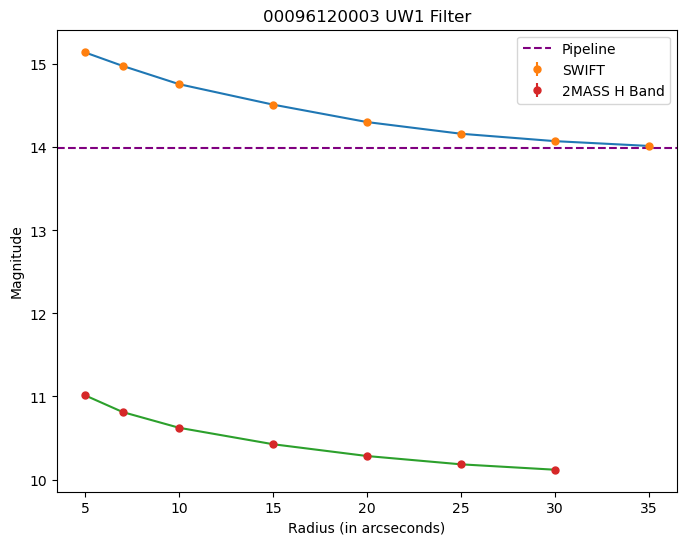

In [24]:
mag_plot('00096120003', 'uw1', 'h')

In [25]:
obs_data = phot.loc[phot['SWIFT Target ID'] == '96120']
# obs_data['UVW2']
# if not obs_data.empty:
#     uv_filter_map = {'uw2': 'UVW2', 'uw1': 'UVW1', 'uuu': 'U', 'um2': 'UVM2'}
#     pipeline_filter = uv_filter_map['uw2']
#     pipeline_mag = obs_data[pipeline_filter].values[0]
#     plt.axhline(pipeline_mag, linestyle='--', color='purple', label='Pipeline')

In [26]:
obs_id = '00096108002'
print(obs_data)
exp = obs_id[-1]
filtered_rows = obs_data[obs_data['Exposure'].str.contains(exp)]
filtered_rows

      Name SWIFT Target ID Exposure     UVM2  UVM2_err     UVM2_flux  \
17  MRK590           96120      2,3  14.5867      0.02  6.790000e-15   
18     NaN           96120        1      NaN       NaN           NaN   

    UVM2_fluxerr     UVW1  UVW1_err     UVW1_flux  UVW1_fluxerr   UVW2  \
17  1.250000e-16  13.9939   0.00886  1.010000e-14  8.210000e-17  14.74   
18           NaN      NaN       NaN           NaN           NaN  14.33   

    UVW2_err     UVW2_flux  UVW2_fluxerr      U   U_err        U_flux  \
17     0.021  6.810000e-15  1.320000e-16  13.51  0.0038  1.400000e-14   
18     0.008  9.940000e-15  7.080000e-17    NaN     NaN           NaN   

       U_fluxerr  
17  4.490000e-17  
18           NaN  


Name SWIFT Target ID Exposure     UVM2  UVM2_err     UVM2_flux  \
17  MRK590           96120      2,3  14.5867      0.02  6.790000e-15   

    UVM2_fluxerr     UVW1  UVW1_err     UVW1_flux  UVW1_fluxerr   UVW2  \
17  1.250000e-16  13.9939   0.00886  1.010000e-14  8.210000e-17  14.74   

    UVW2_err     UVW2_flux  UVW2_fluxerr      U   U_err        U_flux  \
17     0.021  6.810000e-15  1.320000e-16  13.51  0.0038  1.400000e-14   

       U_fluxerr  
17  4.490000e-17

In [27]:
def mag_plot(obs_id, uv_filter, ir_filter):
    # Get the current working directory
    cdir = os.getcwd()

    # Set up empty lists for storing magnitudes and errors
    mags = []
    errs = []

    # Define the radius values
    radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

    # Loop over the radius values
    for radius in radii:
        # Construct the filepath for the FITS file
        filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius)}00_{obs_id}.fits"

        # Check if the file exists
        if not os.path.exists(filepath):
            raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")

        # Read the FITS file and extract the data
        mag_data = Table(fits.getdata(filepath))

        # Calculate the mean magnitude and error
        mags.append(np.mean(mag_data['MAG']))
        errs.append(np.mean(mag_data['MAG_ERR']))

    # Calculate the index for accessing the 2MASS data
    obs = int(int(obs_id)/1000)
    exp = obs_id[-1]
    idx = obs-96107

    # Define the IR radii
    ir_radii = [5, 7, 10, 15, 20, 25, 30]

    # Initialize lists for storing IR magnitudes and errors
    imags = []
    ierrs = []

    # Loop over the IR radii
    for r in ir_radii:
        imags.append(two_mass.iloc[idx][f'{ir_filter}_m_{r}'])
        ierrs.append(two_mass.iloc[idx][f'{ir_filter}_msig_{r}'])

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(radii, mags, label='SWIFT')
    plt.errorbar(radii, mags, yerr=errs, fmt='o', markersize=5)
    plt.plot(ir_radii, imags, label=f'2MASS {ir_filter.upper()} Band')
    plt.errorbar(ir_radii, imags, yerr=ierrs, fmt='o', markersize=5)

    # Get the pipeline magnitude for the UV filter
    obs_data_old = phot.loc[phot['SWIFT Target ID'] == str(obs)]
    obs_data = obs_data_old[obs_data_old['Exposure'].str.contains(exp)]
    if not obs_data.empty:
        uv_filter_map = {'uw2': 'UVW2', 'uw1': 'UVW1', 'uuu': 'U', 'um2': 'UVM2'}
        pipeline_filter = uv_filter_map[uv_filter]
        pipeline_mag = obs_data[pipeline_filter].values[0]

    # Add the pipeline magnitude as a horizontal line
    plt.axhline(pipeline_mag, linestyle='--', color='purple', label='Pipeline')

    # Set the plot title, labels, and legend
    plt.title(f'{obs_id} {uv_filter.upper()} Filter')
    plt.xlabel('Radius (in arcseconds)')
    plt.ylabel('Magnitude')
    plt.legend()

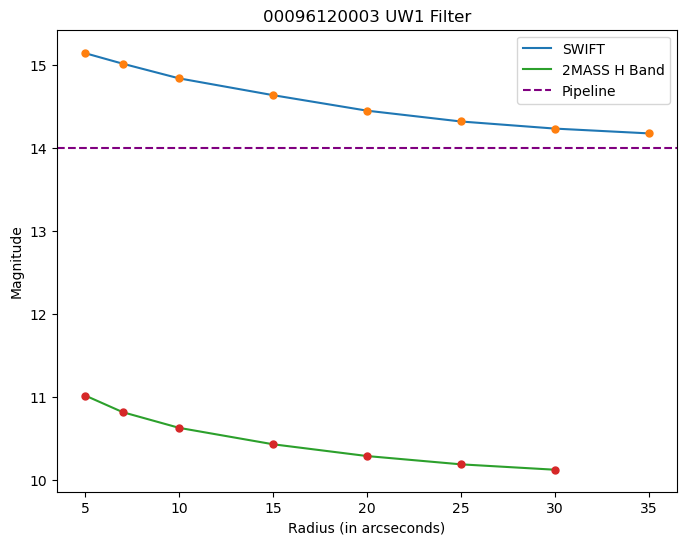

In [28]:
mag_plot('00096120003', 'uw1', 'h')

In [32]:
def mag_plot(obs_id, uv_filter, ir_filter):
    # Get current directory
    cdir = os.getcwd()

    # Initialize lists for magnitudes and errors
    mags = np.array([])
    errs = np.array([])

    # Define radii and loop over them
    radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
    for radius in radii:
        filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius)}00_{obs_id}.fits"
        if not os.path.exists(filepath):
            raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")
        maghist = fits.open(filepath)
        mag_data = Table(maghist[1].data)
        mags = np.append(mags, mag_data['MAG'].mean())
        errs = np.append(errs, mag_data['MAG_ERR'].mean())

    # Get index for 2MASS data
    idx = int(int(obs_id) / 1000 - 96107)

    # Define IR radii and loop over them
    ir_radii = [5, 7, 10, 15, 20, 25, 30]
    imags = np.array([])
    ierrs = np.array([])
    for r in ir_radii:
        imags = np.append(imags, two_mass.iloc[idx][[f'{ir_filter}_m_{r}']].values[0])
        ierrs = np.append(ierrs, two_mass.iloc[idx][[f'{ir_filter}_msig_{r}']].values[0])

    # Create the figure and axes with a black background
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.set_facecolor('k')

    # Plot SWIFT data with modified red color
    ax.plot(radii, mags, color='tomato', linestyle='-', marker='o', markersize=5, label='SWIFT')
    ax.errorbar(radii, mags, yerr=errs, fmt='none', ecolor='tomato', capsize=3)

    # Plot 2MASS data with modified blue color
    ax.plot(ir_radii, imags, color='#069af3', linestyle='-', marker='o', markersize=5, label=f'2MASS {ir_filter.upper()} Band')
    ax.errorbar(ir_radii, imags, yerr=ierrs, fmt='none', ecolor='#069af3', capsize=3)

    # Add horizontal line for pipeline magnitude with white color
    obs_data = phot.loc[phot['SWIFT Target ID'] == str(int(obs_id) // 1000)]
    if not obs_data.empty:
        uv_filter_map = {'uw2': 'UVW2', 'uw1': 'UVW1', 'uuu': 'U', 'um2': 'UVM2'}
        pipeline_filter = uv_filter_map[uv_filter]
        pipeline_mag = obs_data[pipeline_filter].values[0]
        ax.axhline(pipeline_mag, linestyle='--', color='white', label='Pipeline')

    # Set plot title, axis labels, and legend with white text color
    ax.set_title(f'{obs_id} {uv_filter.upper()} Filter', fontsize=16, color='white')
    ax.set_xlabel('Radius (in arcseconds)', fontsize=12, color='white')
    ax.set_ylabel('Magnitude', fontsize=12, color='white')
    ax.legend(fontsize=10, loc='best')

    # Customize plot aesthetics
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_edgecolor('white')
    ax.spines['left'].set_edgecolor('white')
    ax.tick_params(axis='both', which='both', direction='out', length=5, width=1, color='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_axisbelow(True)

    # Set the figure facecolor to black
    fig.set_facecolor('black')

    # Show the plot
    plt.tight_layout()
    plt.savefig(f'{obs_id}_{uv_filter}_{ir_filter}')
    plt.show()
    return mags, errs, imags, ierrs

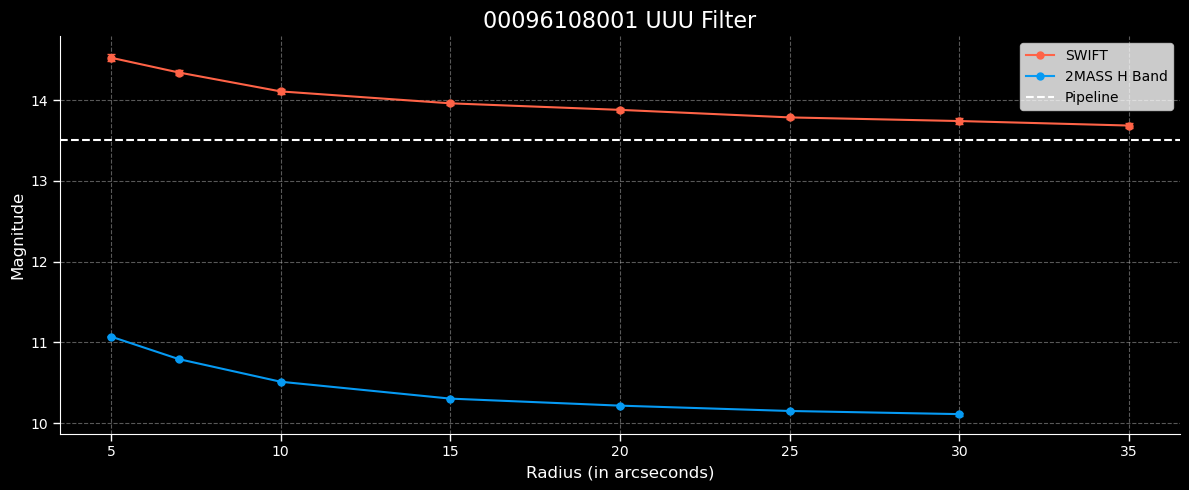

In [33]:
mags, errs, imags, ierrs = mag_plot('00096108001', 'uuu', 'h')

In [ ]:
error = np.sqrt(errs[:7]**2+ierrs**2)
diff = mags[:7]-imags
plt.plot(radii[:7], diff, linestyle='-', marker='o', markersize=5)
plt.errorbar(radii[:7], diff, yerr=error, fmt='none', capsize=3)
plt.grid()
plt.ylim(np.mean(diff)-2,np.mean(diff)+2);